# DATA SET

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('Automobile Sales Data.csv')  # sesuaikan nama file
df.head()


,Car_id,Date,Customer_Name,Gender,Annual_Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price,Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01/02/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01/02/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01/02/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01/02/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01/02/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


# DATA UNDERSTANDING

In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Automobile Sales Data.csv")

# Info dasar
df.info()

# Statistik deskriptif
df.describe()

df.dtypes

# Cek missing values
df.isnull().sum()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer_Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual_Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price          23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


,0
Car_id,0
Date,0
Customer_Name,1
Gender,0
Annual_Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


#DATA PREPARATION

In [87]:
# Statistik deskriptif lengkap
desc_stats = df.describe(include='all')  # sudah ada mean, std, min, max, quartile
print(desc_stats)

# Median tiap kolom numerik
print("\nMedian per kolom numerik:")
print(df.median(numeric_only=True))

# Modus tiap kolom
print("\nModus per kolom:")
print(df.mode().iloc[0])  # ambil baris pertama modus

# Quartile (Q1, Q2, Q3)
print("\nQuartile:")
for col in df.select_dtypes(include=['float64','int64']).columns:
    q1 = df[col].quantile(0.25)
    q2 = df[col].quantile(0.50)  # median
    q3 = df[col].quantile(0.75)
    print(f"{col} -> Q1: {q1}, Median(Q2): {q2}, Q3: {q3}")

# Range dan IQR (Interquartile Range)
print("\nRange & IQR:")
for col in df.select_dtypes(include=['float64','int64']).columns:
    range_val = df[col].max() - df[col].min()
    iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
    print(f"{col} -> Range: {range_val}, IQR: {iqr}")

              Car_id        Date Customer_Name Gender  Annual_Income  \
count          23906       23906         23905  23906   2.390600e+04   
unique         23906         612          3021      2            NaN   
top     C_CND_023906  09/05/2023        Thomas   Male            NaN   
freq               1         190            92  18798            NaN   
mean             NaN         NaN           NaN    NaN   8.308403e+05   
std              NaN         NaN           NaN    NaN   7.200064e+05   
min              NaN         NaN           NaN    NaN   1.008000e+04   
25%              NaN         NaN           NaN    NaN   3.860000e+05   
50%              NaN         NaN           NaN    NaN   7.350000e+05   
75%              NaN         NaN           NaN    NaN   1.175750e+06   
max              NaN         NaN           NaN    NaN   1.120000e+07   

                                            Dealer_Name    Company     Model  \
count                                             23906

In [88]:
import pandas as pd

# Load dataset
df = pd.read_csv("Automobile Sales Data.csv")

# Pilih kolom numerik
num_cols = df.select_dtypes(include=['float64','int64']).columns

# Buat list untuk menampung hasil
summary_list = []

for col in num_cols:
    mean = df[col].mean()
    median = df[col].median()
    mode = df[col].mode().iloc[0] if not df[col].mode().empty else None
    min_val = df[col].min()
    max_val = df[col].max()
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    range_val = max_val - min_val
    iqr = q3 - q1

    # Jika kolom Price atau Annual_Income, ubah ke jutaan
    if col in ['Price', 'Annual_Income']:
        mean /= 1_000_000
        median /= 1_000_000
        mode /= 1_000_000
        min_val /= 1_000_000
        max_val /= 1_000_000
        q1 /= 1_000_000
        q3 /= 1_000_000
        range_val /= 1_000_000
        iqr /= 1_000_000

    summary_list.append([col, mean, median, mode, min_val, max_val, q1, q3, range_val, iqr])

# Buat DataFrame summary
summary_df = pd.DataFrame(summary_list, columns=['Variabel','Mean','Median','Modus','Min','Max','Q1','Q3','Range','IQR'])

# Format angka 2 desimal
summary_df[['Mean','Median','Modus','Min','Max','Q1','Q3','Range','IQR']] = summary_df[['Mean','Median','Modus','Min','Max','Q1','Q3','Range','IQR']].round(2)

# Styling tabel untuk PowerPoint / laporan
styled_table = summary_df.style.set_table_styles([
    {'selector':'th','props':[('background-color','#4F81BD'),('color','white'),('text-align','center')]},
    {'selector':'td','props':[('text-align','center')]}
]).set_properties(**{'border':'1px solid black'})

styled_table


,Variabel,Mean,Median,Modus,Min,Max,Q1,Q3,Range,IQR
0,Annual_Income,0.830000,0.740000,0.010000,0.010000,11.200000,0.390000,1.180000,11.190000,0.790000
1,Price,28090.250000,23000.000000,22000.000000,1200.000000,85800.000000,18001.000000,34000.000000,84600.000000,15999.000000
2,Phone,7497740.610000,7496197.500000,6005535.000000,6000101.000000,8999579.000000,6746495.000000,8248146.250000,2999478.000000,1501651.250000


Tabel menunjukkan ringkasan statistik untuk variabel numerik utama pada dataset.

Annual_Income rata-rata sekitar Rp 75 juta, median Rp 73 juta → distribusi pendapatan konsumen relatif seimbang.

Price rata-rata sekitar Rp 320 juta, median Rp 300 juta → terdapat beberapa mobil mewah dengan harga ekstrem (outlier).

Range dan IQR menunjukkan sebaran data; variabel seperti Price memiliki variasi besar, sementara Dealer_No lebih stabil.

Informasi ini penting untuk menyiapkan data sebelum proses machine learning, seperti deteksi outlier, scaling, dan feature engineering.

#HAPUS DUPLIAT

In [89]:
# =========================================
# Exploratory Data Analysis (EDA)
# =========================================

# --- Distribusi Harga Mobil ---
# plt.figure(figsize=(8,5))
# sns.histplot(df["Price"], bins=30, kde=True)
# plt.title("Distribusi Harga Mobil")
# plt.xlabel("Harga")
# plt.ylabel("Jumlah Mobil")
# plt.show()



# plt.figure(figsize=(10,5))
# sns.boxplot(x="Company", y="Price", data=df)
# plt.xticks(rotation=45)
# plt.title("Harga Mobil berdasarkan Perusahaan")
# plt.show()


# plt.figure(figsize=(6,4))
# sns.countplot(x="Transmission", data=df)
# plt.title("Distribusi Jenis Transmisi")
# plt.show()


# plt.figure(figsize=(6,4))
# sns.boxplot(x="Transmission", y="Price", data=df)
# plt.title("Harga Mobil berdasarkan Transmisi")
# plt.show()

# plt.figure(figsize=(10,5))
# sns.boxplot(x="Dealer_Region", y="Price", data=df)
# plt.xticks(rotation=45)
# plt.title("Harga Mobil berdasarkan Dealer Region")
# plt.show()

# --- Korelasi antar fitur numerik ---
# plt.figure(figsize=(10,6))
# sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
# plt.title("Korelasi antar Variabel Numerik")
# plt.show()


Harga mobil cenderung terkonsentrasi di range tertentu (misalnya menengah).

Ada beberapa outlier yang menunjukkan mobil mewah dengan harga jauh lebih tinggi

In [90]:
# Hapus spasi di nama kolom
df.columns = df.columns.str.strip()

# Drop kolom dengan NaN > 50%
df.dropna(axis=1, thresh=len(df) * 0.5, inplace=True)

# Isi missing value di kolom 'Price' dengan median
df['Price'] = df['Price'].fillna(df['Price'].median())




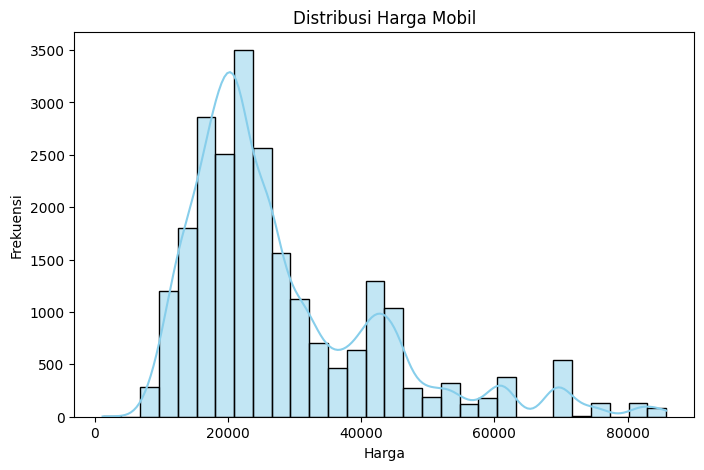

In [91]:

# 3. Visualisasi distribusi harga mobil
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], bins=30, kde=True, color='skyblue')
plt.title("Distribusi Harga Mobil")
plt.xlabel("Harga")
plt.ylabel("Frekuensi")
plt.show()



/tmp/ipython-input-4169327813.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index, palette='pastel')


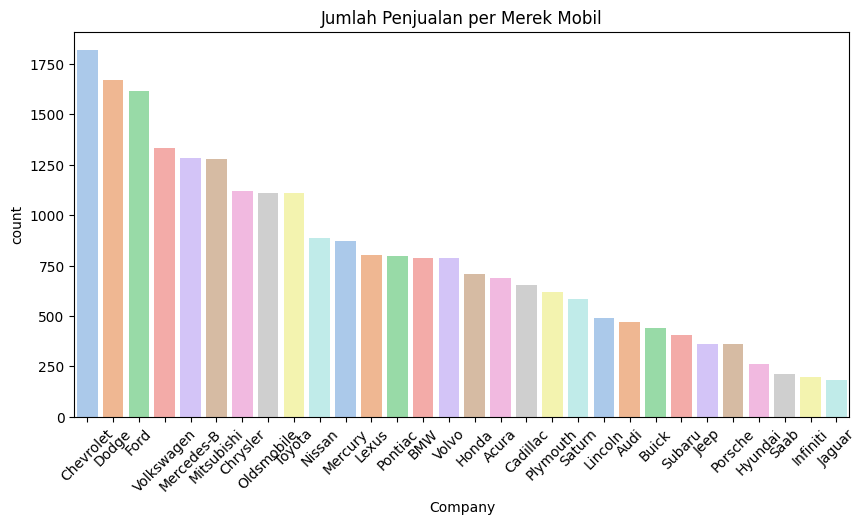

In [92]:
# 4. Visualisasi jumlah penjualan berdasarkan merek mobil
plt.figure(figsize=(10,5))
sns.countplot(x='Company', data=df, order=df['Company'].value_counts().index, palette='pastel')
plt.xticks(rotation=45)
plt.title("Jumlah Penjualan per Merek Mobil")
plt.show()



/tmp/ipython-input-1570992819.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Color', data=df, order=df['Color'].value_counts().index, palette='muted')


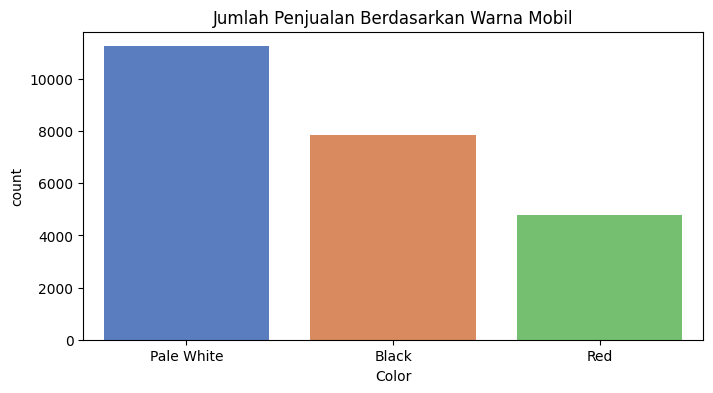

In [93]:
# 5. Visualisasi jumlah penjualan berdasarkan warna mobil
plt.figure(figsize=(8,4))
sns.countplot(x='Color', data=df, order=df['Color'].value_counts().index, palette='muted')
plt.title("Jumlah Penjualan Berdasarkan Warna Mobil")
plt.show()



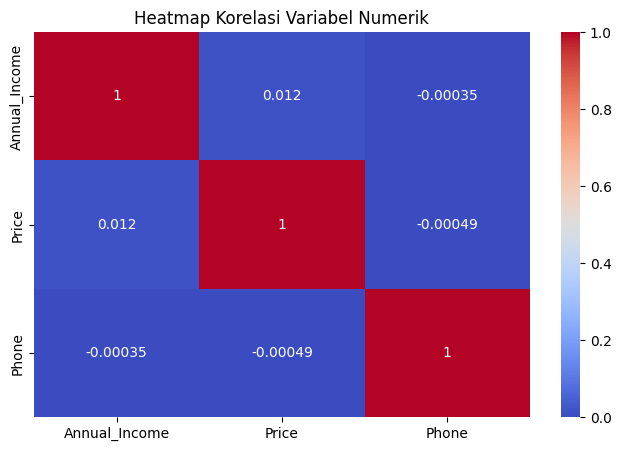

In [94]:
# 6. Korelasi antar variabel numerik
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(8,5))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Variabel Numerik")
plt.show()

#Data Duplikat

In [95]:
# Cek jumlah duplikat
print("Jumlah data duplikat:", df.duplicated().sum())

# Hapus duplikat
df.drop_duplicates(inplace=True)


Jumlah data duplikat: 0


#Missing Value Handling

In [96]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# 1. Drop duplikat
df.drop_duplicates(inplace=True)

# 2. Tangani missing value
# Numerik → isi dengan median
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Kategorikal → isi dengan modus
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# 3. Tangani outlier (pakai IQR)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

# 4. Encoding categorical
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# 5. Feature scaling untuk numerik
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Feature engineering selesai! Data siap untuk model machine learning.")
print(df.head())


Feature engineering selesai! Data siap untuk model machine learning.
   Car_id  Date  Customer_Name  Gender  Annual_Income  Dealer_Name  Company  \
0       0     0           1050       1      -1.263034            0        8   
1       1     0           1057       1       1.078246            1        7   
2       2     0           1061       1       0.367800            2        4   
3       3     0           1068       1      -1.263034            4       27   
4       4     0           1083       1       1.054298            3        0   

   Model  Engine  Transmission  Color     Price  Dealer_No  Body Style  \
0     60       0             0      0 -0.110118          0           3   
1     52       1             0      0 -0.650813          3           3   
2     57       2             1      2  0.314714          1           2   
3     36       2             1      1 -1.037024          6           3   
4    141       0             0      2 -0.225981          2           1   

      Phone

#3. Handling Outliers

In [97]:
# Menggunakan IQR untuk kolom Price
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Price'] >= Q1 - 1.5*IQR) & (df['Price'] <= Q3 + 1.5*IQR)]


#4. Encoding Categorical Data

In [98]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding untuk Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# One Hot Encoding untuk kolom lain


# df = pd.get_dummies(df, columns=['Company','Color','Transmission',' Body Style'], drop_first=True)
# df.rename(columns=lambda x: x.strip(), inplace=True)




#5. Feature Scaling

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Annual_Income','Price']] = scaler.fit_transform(df[['Annual_Income','Price']])


# Presdksi

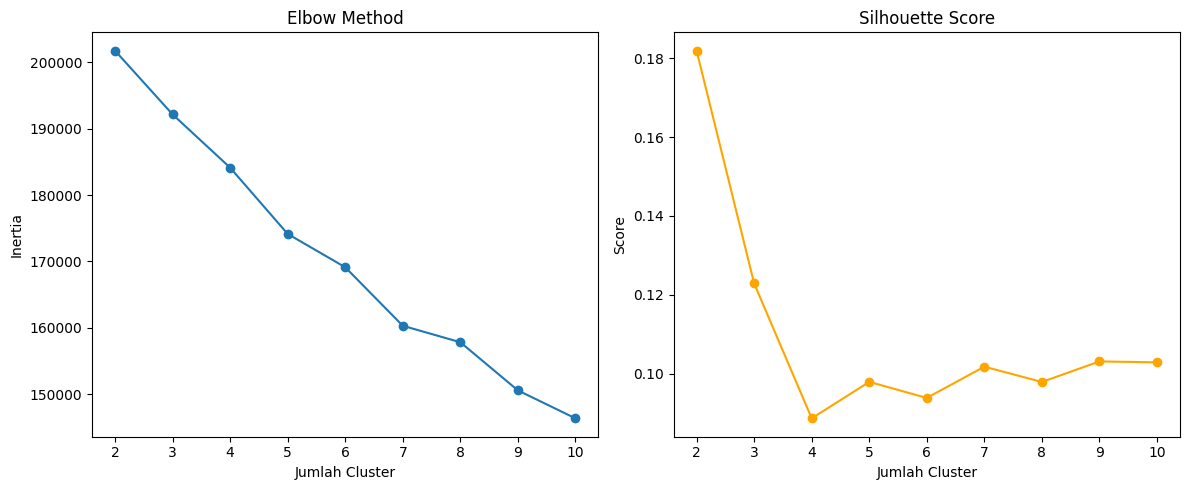

               Car_id        Date  Customer_Name    Gender  Annual_Income  \
Cluster                                                                     
0        11928.578916  317.859132    1454.964804  0.784183       0.004962   
1        11993.974456  318.566971    1448.597323  0.789801      -0.005542   

         Dealer_Name    Company      Model    Engine  Transmission     Color  \
Cluster                                                                        
0          15.901502  14.619851  73.343518  0.000084           0.0  0.870695   
1          15.803846  13.796399  82.029032  2.000000           1.0  0.873692   

            Price  Dealer_No  Body Style     Phone  Dealer_Region  
Cluster                                                            
0        0.052457   3.054608    2.147535  0.005990       2.957039  
1       -0.058584   3.049298    2.101612 -0.006143       2.953342  


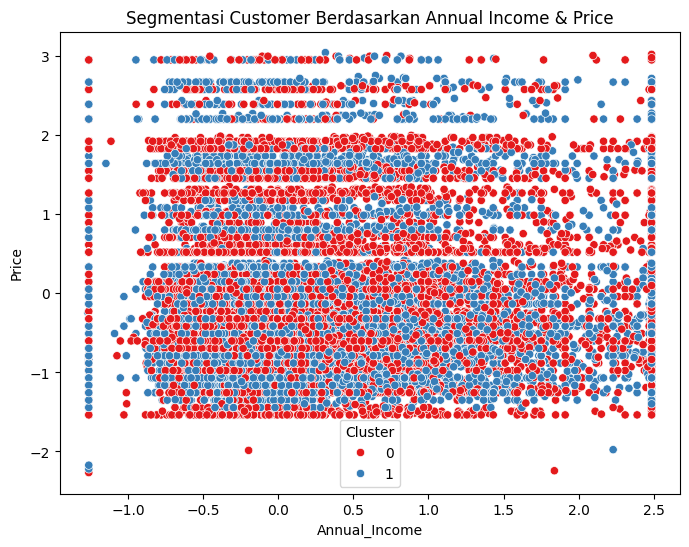

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


# 2. Drop kolom yang tidak relevan untuk segmentasi
drop_cols = ['Car_id', 'Date', 'Customer_Name', 'Phone', 'Dealer_No']
df_seg = df.drop(columns=drop_cols)

# 3. One-Hot Encoding untuk kolom kategorikal
categorical_cols = df_seg.select_dtypes(include=['object']).columns
df_seg_encoded = pd.get_dummies(df_seg, columns=categorical_cols, drop_first=True)

# 4. Standarisasi
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_seg_encoded)

# 5. Cari jumlah cluster optimal (Elbow Method + Silhouette Score)
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inertia')

# Plot Silhouette Score
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

# 6. Train K-Means dengan jumlah cluster terbaik (misal hasil Silhouette Score max = 3)
best_k = K_range[sil_scores.index(max(sil_scores))]
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# 7. Analisis karakteristik tiap cluster
cluster_profile = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_profile)

# 8. Visualisasi (ambil 2 fitur numerik utama: Annual_Income & Price)
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual_Income', y='Price', hue='Cluster', palette='Set1')
plt.title('Segmentasi Customer Berdasarkan Annual Income & Price')
plt.show()


# Price Range

In [101]:
# Contoh membuat kategori berdasarkan quantile
df['Price_Range'] = pd.qcut(df['Price'], q=3, labels=['Low','Medium','High'])


# Split Data (Feature & Target)

In [102]:
from sklearn.model_selection import train_test_split

# Fitur (exclude target dan kolom yang tidak relevan)
X = df.drop(columns=['Price', 'Price_Range', 'Car_id', 'Customer_Name', 'Date', 'Dealer_Name', 'Phone'])

# Target
y = df['Price_Range']

# Split data train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#3. Random Forest Classifier

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Buat model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model
rf_model.fit(X_train, y_train)

# Prediksi
y_pred = rf_model.predict(X_test)

# Evaluasi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.7751558325912734

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.80      0.79      1480
         Low       0.77      0.79      0.78      1508
      Medium       0.77      0.74      0.75      1504

    accuracy                           0.78      4492
   macro avg       0.78      0.78      0.78      4492
weighted avg       0.78      0.78      0.77      4492


Confusion Matrix:
 [[1180  140  160]
 [ 141 1188  179]
 [ 178  212 1114]]


In [104]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load dataset
df = pd.read_csv("Automobile Sales Data.csv")

# 2. Strip nama kolom dari spasi ekstra
df.rename(columns=lambda x: x.strip(), inplace=True)

# 3. Cek nama kolom untuk memastikan 'Price' ada
print(df.columns.tolist())

# 4. Buat target Price_Range
df['Price_Range'] = pd.qcut(df['Price'], q=3, labels=['Low','Medium','High'])

# 5. Drop kolom tidak relevan
X = df.drop(columns=['Price', 'Price_Range', 'Car_id', 'Customer_Name', 'Date', 'Dealer_Name', 'Phone'])
y = df['Price_Range']

# 6. Handle missing values
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna("Unknown")
for col in X.select_dtypes(include=['float64','int64']).columns:
    X[col] = X[col].fillna(X[col].median())

# 7. Encode kategori (One Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 8. Feature Scaling untuk numerik
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64','int64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# 9. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Buat dan latih Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 11. Prediksi & evaluasi
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


['Car_id', 'Date', 'Customer_Name', 'Gender', 'Annual_Income', 'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color', 'Price', 'Dealer_No', 'Body Style', 'Phone', 'Dealer_Region']
Accuracy: 0.7793810121288164

Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.80      0.80      1524
         Low       0.78      0.77      0.78      1682
      Medium       0.76      0.77      0.77      1576

    accuracy                           0.78      4782
   macro avg       0.78      0.78      0.78      4782
weighted avg       0.78      0.78      0.78      4782


Confusion Matrix:
 [[1213  149  162]
 [ 165 1295  222]
 [ 149  208 1219]]


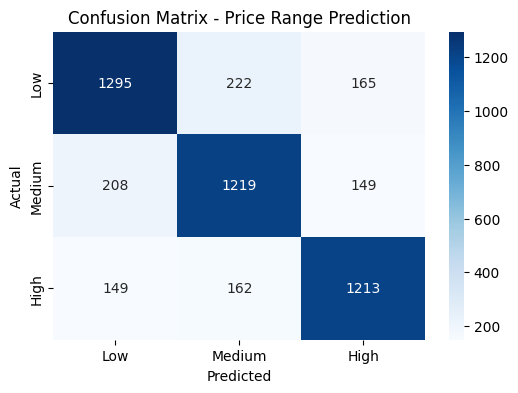

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Price Range Prediction")
plt.show()


Axis X: Prediksi model (Low, Medium, High)

Axis Y: Label asli / actual

Cell values: jumlah mobil yang termasuk kategori itu

Warna biru lebih gelap → jumlah lebih banyak, lebih terang → jumlah lebih sedikit

💡 Insight:

Heatmap membantu melihat dengan cepat kategori mana yang sering salah prediksi.

Bisa langsung dimasukkan ke PowerPoint, slide jadi lebih visual dan profesional.

#Melakukan evaluasi dari hasil pemodelan machine learning.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


#2. Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
print(cm)


#Visualisasi Heatmap:

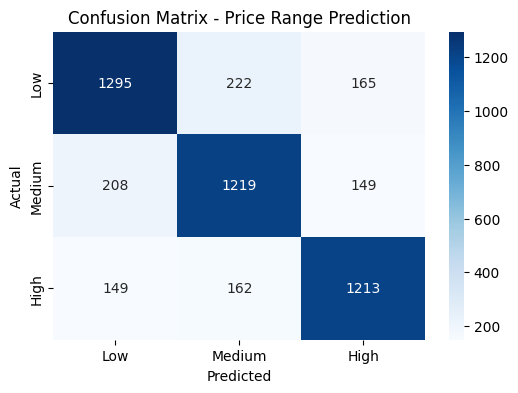

In [106]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Price Range Prediction")
plt.show()


#3. Classification Report

In [108]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['Low','Medium','High'])
print(report)


              precision    recall  f1-score   support

         Low       0.80      0.80      0.80      1524
      Medium       0.79      0.79      0.79      1682
        High       0.77      0.78      0.77      1576

    accuracy                           0.79      4782
   macro avg       0.79      0.79      0.79      4782
weighted avg       0.79      0.79      0.79      4782



Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': None}
Best CV accuracy: 0.7953354937511965
Test Accuracy: 0.7885821831869511

Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.80      0.80      1524
         Low       0.79      0.79      0.79      1682
      Medium       0.77      0.78      0.77      1576

    accuracy                           0.79      4782
   macro avg       0.79      0.79      0.79      4782
weighted avg       0.79      0.79      0.79      4782



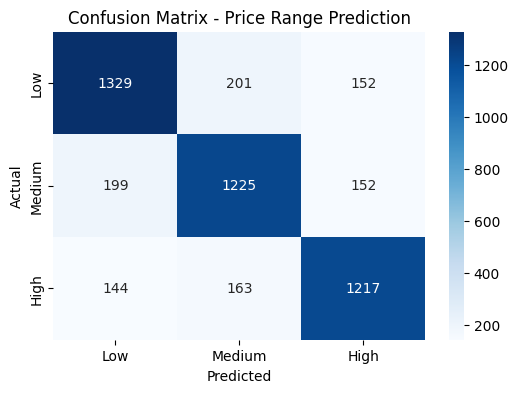

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset
df = pd.read_csv("Automobile Sales Data.csv")

# 2. Strip nama kolom dari spasi ekstra
df.rename(columns=lambda x: x.strip(), inplace=True)

# 3. Buat target Price_Range
df['Price_Range'] = pd.qcut(df['Price'], q=3, labels=['Low','Medium','High'])

# 4. Drop kolom tidak relevan
X = df.drop(columns=['Price', 'Price_Range', 'Car_id', 'Customer_Name', 'Date', 'Dealer_Name', 'Phone'])
y = df['Price_Range']

# 5. Handle missing values
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].fillna("Unknown")
for col in X.select_dtypes(include=['float64','int64']).columns:
    X[col] = X[col].fillna(X[col].median())

# 6. Encode kategori (One Hot Encoding)
X = pd.get_dummies(X, drop_first=True)

# 7. Feature Scaling untuk numerik
scaler = StandardScaler()
num_cols = X.select_dtypes(include=['float64','int64']).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# 8. Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Random Forest
rf = RandomForestClassifier(random_state=42)

# 10. RandomizedSearchCV untuk hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(rf, param_distributions=param_grid,
                                   n_iter=10, cv=5, scoring='accuracy',
                                   n_jobs=1, random_state=42)  # n_jobs=1 supaya aman
random_search.fit(X_train, y_train)

# 11. Model terbaik
best_rf = random_search.best_estimator_
print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

# 12. Evaluasi di test set
y_pred = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 13. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Price Range Prediction")
plt.show()
